In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


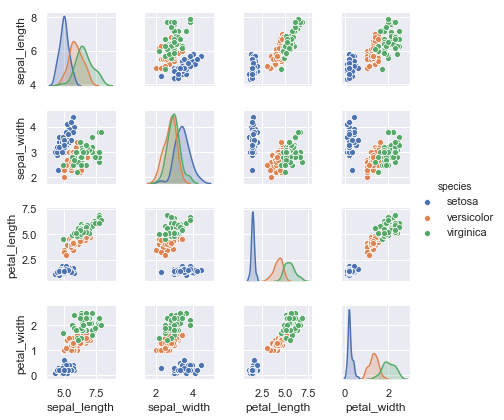

In [2]:
%matplotlib inline
sns.set()       
sns.pairplot(iris, hue='species', height=1.5);

**有监督学习示例：鸢尾花数据分类**

In [3]:
X_iris = iris.drop('species', axis=1)  ## split to Feature Matirx 分离出特征·矩阵X_iris（样本数目samples *特征数目 features)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']       ## split to Target Vector 目标向量
y_iris.shape

(150,)

**将数据分割成训练集（training set）和测试集（testingset）**

In [5]:
from sklearn.model_selection import  train_test_split  ## 训练测试分割函数 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)  ## 训练集和测试集分割 

In [6]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类  Gaussian Native Bayes 高斯朴素贝叶斯      
model = GaussianNB() # 2.初始化模型        
model.fit(Xtrain, ytrain) # 3.用模型拟合数据    
y_model = model.predict(Xtest) # 4.对新数据进行预测

In [7]:
Xtest

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [8]:
ytest

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
94     versicolor
5          setosa
102     virginica
51     versicolor
78     versicolor
42         setosa
92     versicolor
66     versicolor
31         setosa
35         setosa
90     versicolor
84     versicolor
77     versicolor
40         setosa
125     virginica
99     versicolor
33         setosa
19         setosa
73     versicolor
146     virginica
91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
48         setosa
53     versicolor
28         setosa
Name: species, dtype: object

In [9]:
from sklearn.metrics import accuracy_score  ## 用accuracy_score工具验证模型预测结果的准确率
accuracy_score(ytest, y_model)

0.9736842105263158

In [10]:
y_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

**无监督学习示例：鸢尾花数据降维**
**主成分分析（principal component analysis，PCA)**

In [11]:
from sklearn.decomposition import PCA  # 1.选择模型类
model = PCA(n_components=2)    # 2.设置超参数，初始化模型
model.fit(X_iris)              # 3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)  # 4. 将数据转换为二维

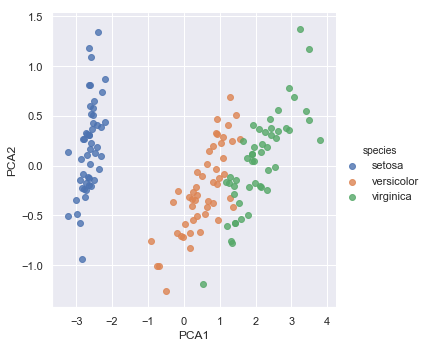

In [12]:
iris['PCA1'] = X_2D[:, 0]        
iris['PCA2'] = X_2D[:, 1]        
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

**无监督学习示例：鸢尾花数据聚类**

In [13]:
from sklearn.mixture import GaussianMixture as GMM # 1.选择模型类
model = GMM(n_components=3,covariance_type='full')  # 2.设置超参数，初始化模型
model.fit(X_iris)                    # 3.拟合数据，注意不需要y变量
y_gmm = model.predict(X_iris)        # 4. 确定簇标签

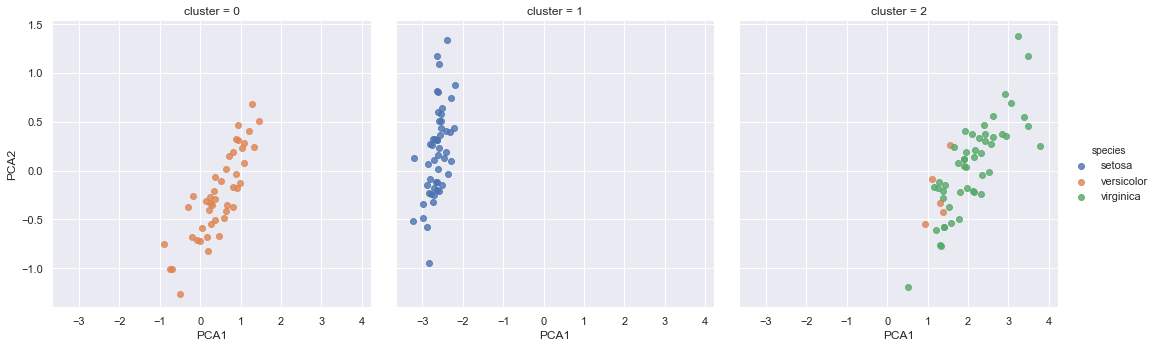

In [14]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',col='cluster', fit_reg=False)

**手写数字识别**

In [15]:
from sklearn.datasets import load_digits        
digits = load_digits()        
digits.images.shape

(1797, 8, 8)

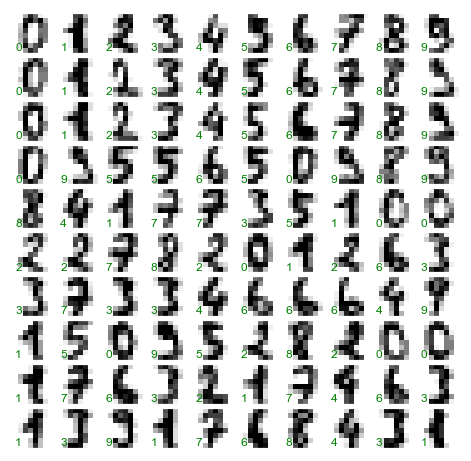

In [16]:
import matplotlib.pyplot as plt        
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))        
for i, ax in enumerate(axes.flat):            
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [17]:
X = digits.data        
X.shape

(1797, 64)

In [18]:
y = digits.target
y.shape

(1797,)

**无监督学习：降维**

In [19]:
from sklearn.manifold import Isomap           ## Isomap(Isometric Feature Mapping)是流行学习的一种       
iso = Isomap(n_components=2)                   ## 2.设置超参数，初始化模型      
iso.fit(digits.data)                           ## 3.拟合数据，注意不需要y变量
data_projected = iso.transform(digits.data)    ## 4.将数据转换为二维  
data_projected.shape

(1797, 2)

**将数据分成训练集和测试集，然后用高斯朴素贝叶斯模型来拟合：**

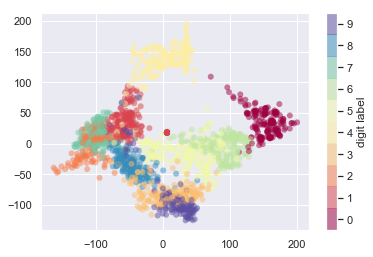

In [20]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', 10)) 
plt.colorbar(label='digit label', ticks=range(10))        
plt.clim(-0.5, 9.5);

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)  

In [22]:
from sklearn.naive_bayes import GaussianNB        
model = GaussianNB()        
model.fit(Xtrain, ytrain)        
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

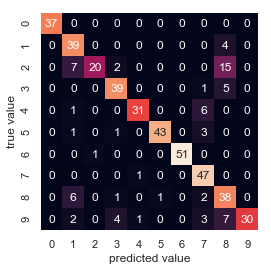

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)        
sns.heatmap(mat, square=True, annot=True, cbar=False)        
plt.xlabel('predicted value')        
plt.ylabel('true value')

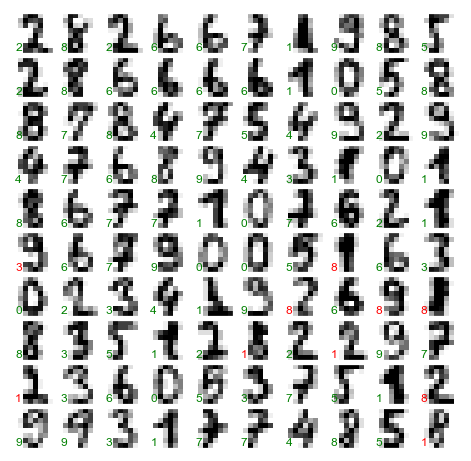

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))        
test_images=Xtest.reshape(-1,8,8)        
for i, ax in enumerate(axes.flat):            
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')            
    ax.text(0.05, 0.05, str(y_model[i]),                    
            transform=ax.transAxes,                    
            color='green' 
            if (ytest[i] == y_model[i]) 
            else 'red')